# Predicting Customer Churn to Aid a Bank's Marketing Strategy

## Business Understanding

The overarching goal of our project is to leverage Machine Learning models for predicting and preventing customer churn in banks across France, Germany, and Spain. Success is defined by reducing bank churn, fostering customer retention, boosting satisfaction, and potentially driving revenue growth through retained customers.

In this project, we tested a couple of models and decided to move forward with a Supervised Learning - Binary Classification Model. The original dataset reflects an overall churn rate of ~20%, signifying a substantial portion of customers at risk. However, for an unbiased model we used SMOTE to have a better model and prediction accuracy. According to the logistic regression model, the top four factors influencing churn are age, active member, gender, and credit cared. This insight guides our strategy towards focusing on key determinants like age and financial metrics to effectively minimize customer churn and enhance overall banking performance.

## Data Understanding - Exploratory Data Analysis

Loading in the data:

In [88]:
import pandas as pd
import numpy as np

In [89]:
df = pd.read_csv("bank_churn2.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


At first look our key features besides customer_id and churn are:
- credit_score
- country
- gender
- age
- tenure
- balance
- products_number
- credit_card
- active_member
- estimated_salary

In [90]:
df.shape

(10000, 12)

There are 10,000 values in our dataset; a pretty large and even amount of datapoints for analysis. Let's dive deeper and see if there needs to be any cleaning done to the dataset.

In [91]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
credit_score,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
products_number,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
credit_card,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
active_member,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48
churn,10000.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00


Takeaways - First Glance
- Average age of customers is approximately 39 years old
- Follow up on the previous point, average salary is about 100k. I wonder what currency this is considering that it is in three different countries or if it has been converted to USD **(Let's assume it's USD)**
- On average, churn rate is about 20% (considering that churn is a binary feature)
- Value counts of every feature match, which means there aren't any missing values in this data set
- Max tenure of the customers of this dataset is 10 years, but on average the tenure is 5 years. This seems like a really short time considering the age range of the customers.

Assumptions
- If active_member is 0 that means that they are idle customers and if it is 1 that means that they are an active customer with an active account.
- Tenure is number of years that a customer has been a part of the bank

In [92]:
df['churn'].value_counts() / len(df['churn'])

0    0.7963
1    0.2037
Name: churn, dtype: float64

20.37% of customers have churned in the dataset. Let's dive deeper to see if there are any features that might be correlated or influence churn.

Current Customers (0) vs. Customers Churned (1)
0    7963
1    2037
Name: churn, dtype: int64


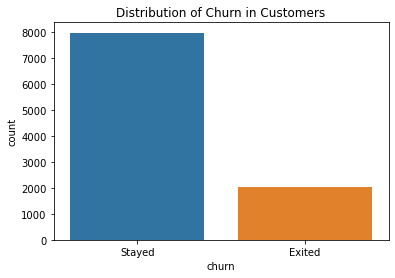

In [93]:
import seaborn as sns

print('Current Customers (0) vs. Customers Churned (1)')
print(df.churn.value_counts())

ax = sns.countplot(data=df,x = 'churn')
ax.set_xticklabels(['Stayed','Exited'])
ax.set_title("Distribution of Churn in Customers");

We have a biased dataset in the sense that there are a lot more customers that stayed rather than churned. This is a note for our modeling to balance out our dataset to have a less biased prediction. In order to address this bias, we have constructed a confusion matrix. For binary classification problems, the confusion matrix defines the base for performance measures, as most of the performance metrics are derived from the confusion matrix, i.e., accuracy, misclassification rate, precision, and recall. This is because standard accuracy is not as reliable for unbalanced datasets.

In [94]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

There are no missing values in any of the columns

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


There are two categorical variables: country and gender. The rest of our variables are either floats or integers.

In [96]:
df.duplicated().sum()

0

There are no duplications in the dataset either, so the dataset is pretty clean to move onto visualizations

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64


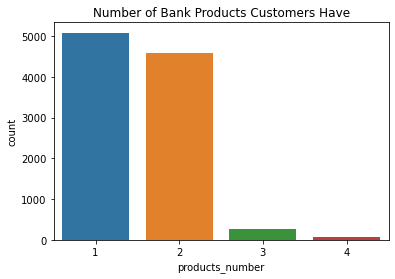

In [97]:
print(df["products_number"].value_counts())
ax = sns.countplot(data=df,x='products_number')

ax.set_title("Number of Bank Products Customers Have");

This bar graph shows that most customers in our dataset have either 1 or 2 products. Product number is correlated to churn, which we will explore more in the next graph. 

<AxesSubplot:xlabel='products_number'>

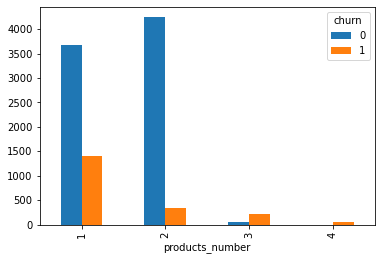

In [98]:
df.groupby(["products_number", "churn"]).size().unstack(level=1).plot(kind='bar')

This bar graph comparison shows that customers with larger product counts are less likely to churn. However, there are less customers with product counts of 3 or higher. This may be something for the banks to focus on in the future in order to reduce churn. If banks are able to give promotions to customers to promote them to acquire more products, this could lead to decreased churn and increased revenue. 

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64


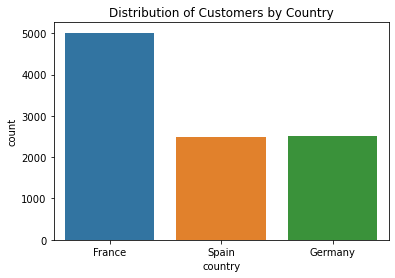

In [99]:
print(df["country"].value_counts())
ax = sns.countplot(data=df,x='country')
ax.set_title("Distribution of Customers by Country");

The countries for this dataset are France, Germany, and Spain. Because of the limited scope of this dataset, our conclusions can be drawn for these countries and potentially other countries in Europe. Because of cultural, financial, and other differences across continents, these results may not be applicable to other countries and continents outside of Europe. This is an area that could be expanded upon in future research. 


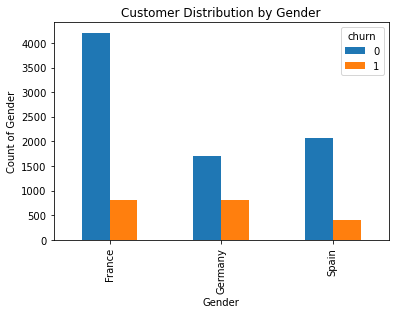

In [100]:
ax = df.groupby(["country", "churn"]).size().unstack(level=1).plot(kind='bar');
ax.set(xlabel='Gender', ylabel='Count of Gender')
ax.set_title("Customer Distribution by Gender");

It seems that the churn rates vary across countries, but it is hard to tell the causation of this or why this may be, as there are several confounding variables that could affect these rates. 

Male      5457
Female    4543
Name: gender, dtype: int64


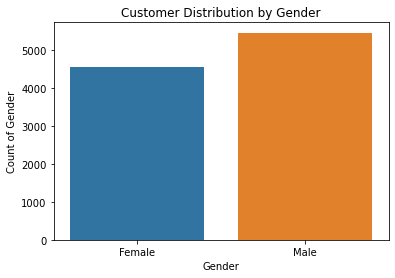

In [101]:
print(df.gender.value_counts())
ax = sns.countplot(data=df,x='gender')
ax.set(xlabel='Gender', ylabel='Count of Gender')
ax.set_title("Customer Distribution by Gender");

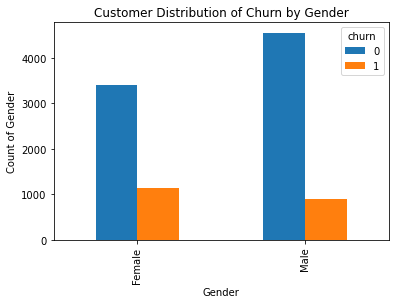

In [102]:
ax = df.groupby(["gender", "churn"]).size().unstack(level=1).plot(kind='bar');
ax.set(xlabel='Gender', ylabel='Count of Gender')
ax.set_title("Customer Distribution of Churn by Gender");

Even though there are more males than females in the dataset, there are more females who don’t churn than males. This is pretty interesting, as it shows that males churn at a higher rate than females. This may be worth investigating further in order to determine the root cause of the churn or if it is just a gender difference. 

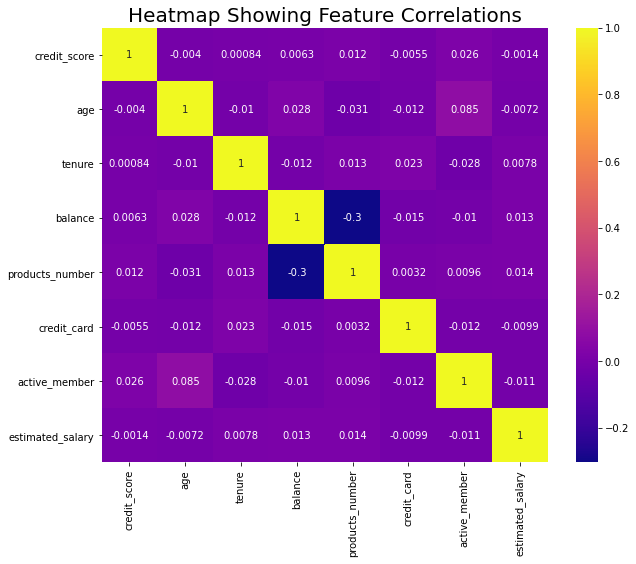

In [103]:
#Visualizing correlations between the features using a heatmap
df2 = df.drop(["churn","customer_id"], axis=1)
corr = df2.corr()
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,8))
plt.title('Heatmap Showing Feature Correlations', fontsize=20)
sns.heatmap(corr,annot=True,cbar=True, cmap='plasma');

- The top three most **positively correlated** values are:
    - **age vs. active_member:** 0.085
    - **age vs. balance:** 0.028
    - **credit_score vs. active_member:** 0.026


- The most **negatively correlated** values is:
    - **balance vs. products_number:** -0.3

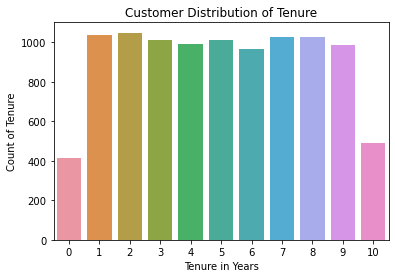

In [104]:
ax = sns.countplot(data = df, x='tenure')
ax.set(xlabel='Tenure in Years', ylabel='Count of Tenure')
ax.set_title("Customer Distribution of Tenure");

From this graph, we can see that tenure is relatively evenly distributed with the exception of 0 years and 10 years occurring less frequently than 1-9 years. 

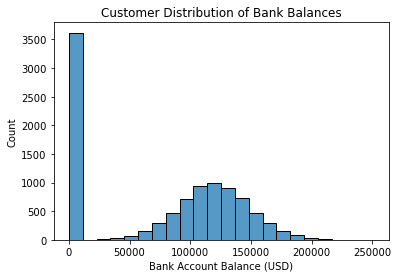

In [105]:
ax = sns.histplot(df['balance'])
ax.set(xlabel='Bank Account Balance (USD)', ylabel='Count')
ax.set_title("Customer Distribution of Bank Balances");


Most people have a balance of 0 maybe 20% of the people who churn come from this category

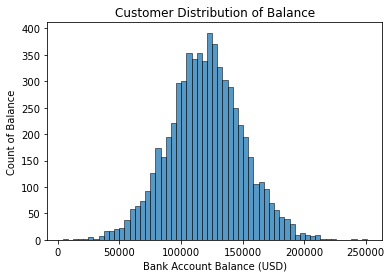

In [106]:
df2 = df[df['balance'] != 0].copy()
ax = sns.histplot(df2['balance'])
ax.set(xlabel='Bank Account Balance (USD)', ylabel = 'Count of Balance')
ax.set_title("Customer Distribution of Balance");

With the balance of 0 removed, the customer distribution of balance is relatively normal. 

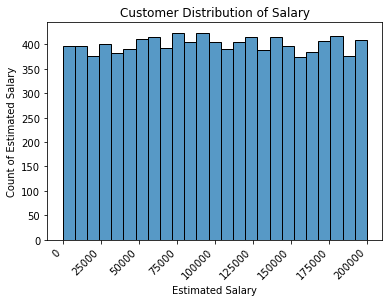

In [107]:
ax = sns.histplot(df['estimated_salary'], bins=25)
plt.xticks(rotation=45, ha='right')
ax.set(xlabel='Estimated Salary', ylabel='Count of Estimated Salary')
ax.set_title("Customer Distribution of Salary");

We can see from the histogram above that the distribution of estimated salary is relatively balanced.

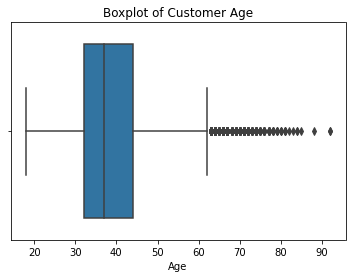

In [108]:
ax = sns.boxplot(data = df, x='age')
ax.set(xlabel='Age')
ax.set_title("Boxplot of Customer Age");

We can see from the boxplot above that age is right skewed. This means that most customers in our dataset are younger, relatively speaking, although there are several older outliers. 

## Modeling



### Multiple Logistic Regression

In [109]:
from sklearn.preprocessing import LabelEncoder

df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['country'] = LabelEncoder().fit_transform(df['country'])

In [110]:
import statsmodels.api as sm

X = df[['credit_score','age','tenure','estimated_salary','balance','products_number','active_member','credit_card','gender','country']]
X = sm.add_constant(X)
y = df['churn']

In [111]:
model = sm.Logit(y, X).fit()
summary = model.summary()

print(summary)

Optimization terminated successfully.
         Current function value: 0.434991
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Fri, 15 Dec 2023   Pseudo R-squ.:                  0.1395
Time:                        16:08:51   Log-Likelihood:                -4349.9
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                7.035e-297
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.5210      0.242    -14.527      0.000      -3.996      -3.046
credit_scor

###### According to the F-Statistic p-value it seems as though the value is much lower than the set alpha of 0.05, indicating that the model is statistically significant.

It also seems as though the following features with a p-value greater than 0.05 (alpha value) are not statistically significant:
- tenure
- estimated_salary
- products_number
- credit_card

### Comparing Logistic Regression without Dataset Values of Zero Balance

Text(0.5, 0, 'Bank Account Balance (USD)')

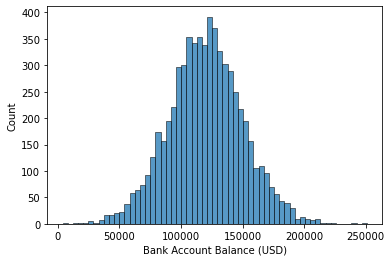

In [112]:
df2 = df[df['balance'] != 0].copy()
ax = sns.histplot(df2['balance'])
ax.set_xlabel('Bank Account Balance (USD)')

In [113]:
df2.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,2,1,44,8,113755.78,2,1,0,149756.71,1
7,15656148,376,1,0,29,4,115046.74,4,1,0,119346.88,1


In [114]:
df2['gender'] = LabelEncoder().fit_transform(df2['gender'])
df2['country'] = LabelEncoder().fit_transform(df2['country'])

X2 = df2[['credit_score','age','tenure','estimated_salary','balance','products_number','active_member','credit_card','gender','country']]
X2 = sm.add_constant(X2)
y2 = df2['churn']

model = sm.Logit(y2, X2).fit()
summary = model.summary()

print(summary)

Optimization terminated successfully.
         Current function value: 0.476947
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 6383
Model:                          Logit   Df Residuals:                     6372
Method:                           MLE   Df Model:                           10
Date:                Fri, 15 Dec 2023   Pseudo R-squ.:                  0.1360
Time:                        16:08:55   Log-Likelihood:                -3044.4
converged:                       True   LL-Null:                       -3523.4
Covariance Type:            nonrobust   LLR p-value:                2.010e-199
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.7435      0.309    -12.104      0.000      -4.350      -3.137
credit_scor

- The probability of F-statistic is still lower than the alpha value of 0.05 indicating that this model is still significant.

Now the features that are not statistically significant has changed increased:
- credit_score
- tenure
- estimated_salary
- balance
- credit_card

**We are going to move forward with our analysis to exclude customers with zero balance. From a business understanding perspective, we believe that there isn't a chance for banks to make a profit from customers who do not have any contributions to the bank. However, for future analysis, this would be a great opportunity to see why there are so many customers with a zero balance.**

In [115]:
df2.shape

(6383, 12)

In [116]:
#How many customers had zero balance in their accounts?
10000-6383

3617

### Evaluation

### Train, Test, Evaluate - Original Dataset

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
#Encoding categorical labels for modelling

from sklearn.preprocessing import LabelEncoder

df2['gender'] = LabelEncoder().fit_transform(df2['gender'])
df2['country'] = LabelEncoder().fit_transform(df2['country'])

X = df2.drop(['customer_id','churn'], axis=1)
y = df2['churn']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [137]:
#Standardize x_train and x_test values for modelling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [138]:
# Fit a model
logreg = LR(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

# Preview model params
print(model_log) 

# Predict
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

print("")
# Data preview
df.head()

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')



,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


Confusion Matrix:
 [[974 601]
 [134 398]]


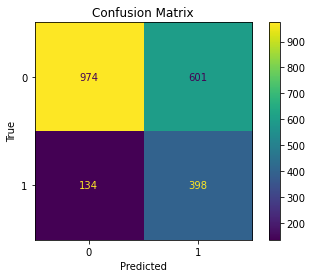

In [139]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

# Import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize your confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels=model_log.classes_)
disp.plot()
disp.ax_.set(xlabel='Predicted', ylabel='True', title='Confusion Matrix');

### Train, Test, Evaluate - Original Dataset

#### Since our original dataset is unbalanced with a lot less churn datapoints, we used SMOTE to synthetically add values to balance out the churn and no churn datapoints

In [156]:
#Balancing our dataset prior to evaluation and modeling (a lot more retention than churn in our dataset)
!pip install imblearn

In [157]:
from imblearn.over_sampling import SMOTE

sm = SMOTE (random_state=42)
X_sm, y_sm = sm.fit_resample (X, y)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33, random_state=42)

In [159]:
#Standardize x_train and x_test values for modelling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [160]:
#Model Training for Logistic Regression, Decision Tree, and Random Forest

from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble  import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score

#Creating a dictionary of models with their names
models = {'Logistic Regression':LR(), 
          'Decision Tree':DT(),
          'Random Forest': RF()}

for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy : {accuracy_score(y_test,y_pred)} ")

Logistic Regression Accuracy : 0.7539856205064083 
Decision Tree Accuracy : 0.745545482963426 
Random Forest Accuracy : 0.833072835261019 


According to what we found, amongst the three models Random Forest Classifier has the highest accuracy. While it isn't as close to 1 it is a reasonable value of at least 83% accuracy for our model

In [161]:
# Fit a model
logreg = LR(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

# Preview model params
print(model_log) 

# Predict
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

print("")
# Data preview
df.head()

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')



,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


Confusion Matrix:
 [[1173  412]
 [ 377 1237]]


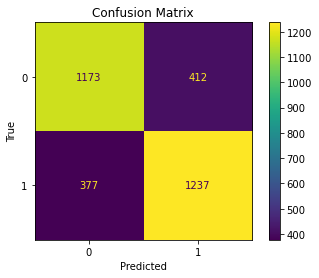

In [162]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

# Import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize your confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels=model_log.classes_)
disp.plot()
disp.ax_.set(xlabel='Predicted', ylabel='True', title='Confusion Matrix');

- True Negative: 1173
- False Positive: 412
- False Negative: 377
- True Positive: 1237

In [163]:
# Your code here
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score as f1

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))

print('---')
print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))

print('---')
print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

print('---')
print('Training F1-Score: ', f1(y_train, y_hat_train))
print('Testing F1-Score: ', f1(y_test, y_hat_test))

Training Precision:  0.7399049881235155
Testing Precision:  0.7501516070345664
---
Training Recall:  0.7710396039603961
Testing Recall:  0.7664188351920694
---
Training Accuracy:  0.7511165870937934
Testing Accuracy:  0.7533604251328541
---
Training F1-Score:  0.7551515151515151
Testing F1-Score:  0.7581979773214832


In [164]:
target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_hat_test, target_names=target_names, digits=4))

              precision    recall  f1-score   support

    No Churn     0.7568    0.7401    0.7483      1585
       Churn     0.7502    0.7664    0.7582      1614

    accuracy                         0.7534      3199
   macro avg     0.7535    0.7532    0.7533      3199
weighted avg     0.7534    0.7534    0.7533      3199



### Feature Importance

In [165]:
lrmodel = LR().fit(X_train,y_train)
predicted_probabilities = lrmodel.predict_proba(X_test)
print(predicted_probabilities)

[[0.8588629  0.1411371 ]
 [0.08216544 0.91783456]
 [0.46050976 0.53949024]
 ...
 [0.14218349 0.85781651]
 [0.39750121 0.60249879]
 [0.83862041 0.16137959]]


Text(0.5, 1.0, 'Logistic Regression Feature Importance')

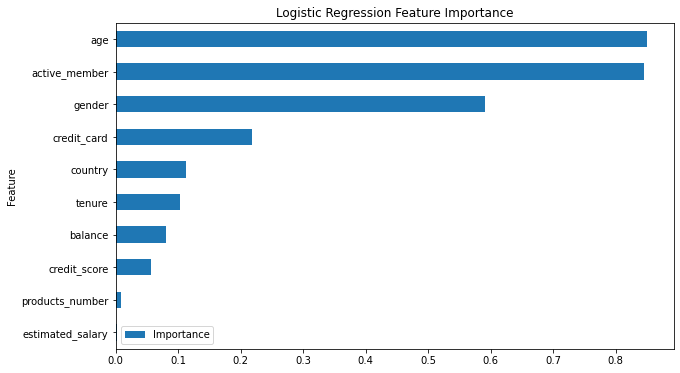

In [166]:
coefficients = lrmodel.coef_
 
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
ax.set_title("Logistic Regression Feature Importance")

In [151]:
pd.crosstab(df2['churn'], pd.cut(df2['age'], bins=10), normalize=True)\
    .round(4)*100

age,"(17.926, 25.4]","(25.4, 32.8]","(32.8, 40.2]","(40.2, 47.6]","(47.6, 55.0]","(55.0, 62.4]","(62.4, 69.8]","(69.8, 77.2]","(77.2, 84.6]","(84.6, 92.0]"
churn,,,,,,,,,,
0,5.36,19.05,30.13,12.49,4.17,2.11,1.39,1.05,0.14,0.03
1,0.53,2.01,5.62,6.66,5.81,2.54,0.72,0.17,0.02,0.00


In [152]:
pd.crosstab(df2['churn'], df2['active_member'], normalize=True)\
    .round(4)*100

active_member,0,1
churn,,
0,33.26,42.66
1,15.38,8.69


Text(0.5, 1.0, 'Churn for number of products')

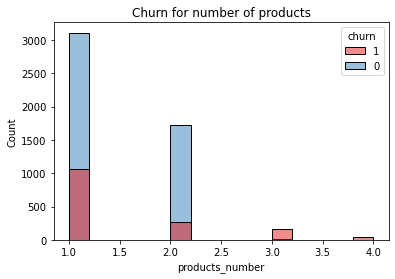

In [153]:
ax = sns.histplot(x = "products_number", hue = "churn", data = df2,bins = 15, palette = "Set1", hue_order = [1,0])
ax.set_title("Churn for number of products")

## Modeling

In [154]:
predicted_probabilities = lrmodel.predict_proba(X_test)
# print(predicted_probabilities[:,1])

copy = df.drop(columns = ['churn', 'customer_id'])

X_test = sc.inverse_transform(X_test)

xdf = pd.DataFrame(X_test, columns=copy.columns) #multiply by sd and then subtract from mean; only columns you need to - can print out parameters 

xdf.head()

xdf['pred'] = predicted_probabilities[:,1]

In [155]:
xdf = xdf.sort_values(by=['pred'], ascending=False)

copyxdf= xdf.drop(columns=['country', 'balance','tenure', 'credit_score', 'estimated_salary', 'credit_card'])

copyxdf.head(10)

,gender,age,products_number,active_member,pred
923,0.0,67.0,1.0,0.0,0.981306
2715,0.0,77.0,1.0,0.0,0.980574
2015,0.0,63.0,2.0,0.0,0.977712
1748,0.0,70.0,2.0,0.0,0.977344
313,0.0,68.0,3.0,0.0,0.976607
129,0.0,68.0,1.0,0.0,0.975322
2262,0.0,70.0,2.0,0.0,0.972018
849,0.0,60.0,1.0,0.0,0.970943
2312,0.0,64.0,2.0,0.0,0.970566
1850,0.0,60.0,1.0,0.0,0.967891


It looks like there is consistency in age range, gender and active members as to whether or not a customer is likely to churn. This is exactly what we had found in our feature importance graph and it confirms that these are the features that should be taken into consideration when banks create marketing for their customers.

## Results

In conclusion, our project aimed at leveraging Machine Learning models to predict and prevent customer churn in banks across France, Germany, and Spain, and has yielded valuable insights. The random forest model, with its high accuracy during testing, identified age, estimated salary, credit score, and balance, as the top factors influencing churn.
 
With an overall churn rate of approximately 20%, signifying a substantial portion of customers at risk, our strategy now focuses on key determinants such as age and financial metrics. Recognizing that customer churn has significant financial implications, our approach aims to minimize churn, foster customer retention, boost satisfaction, and potentially drive revenue growth through retained customers.
 
We emphasize the importance of effective intervention strategies. Given the ease of changing banks in the era of online banking and mobile applications, predictive insights from our model offer a strategic advantage. By targeting influential features identified by the random forest model in marketing campaigns and promotions, banks can enhance overall banking performance and mitigate the costly process of acquiring new customers.

## Archive

In [48]:
# lrmodel = LR().fit(X_train,y_train)
# x_pred = lrmodel.predict(X_test)

In [49]:
# from sklearn import metrics
# confusion_matrix = metrics.confusion_matrix(y_test, x_pred)
# confusion_matrix

# import seaborn as sns
# group_names = ['True Neg','False Pos','False Neg','True Pos']
# group_counts = ["{0:0.0f}".format(value) for value in
#                 confusion_matrix.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in
#                      confusion_matrix.flatten()/np.sum(confusion_matrix)]
# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
#           zip(group_names,group_counts,group_percentages)]
# labels = np.asarray(labels).reshape(2,2)
# ax = sns.heatmap(confusion_matrix, annot=labels, fmt="", cmap='Blues')
# ax.set_title("Confusion Matrix")